# Importing Libraries

In [1]:
# modules we'll use
import pandas as pd #linear algebra
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

from scipy.stats import norm
import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir("C:/Users/JAHNAVI DEVI/Downloads/hfi_cc_2018")

# Importing dataset

In [2]:
data = pd.read_csv("hfi_cc_2018.csv")
data

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [3]:
data.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [4]:
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [5]:
data.head(10)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,NaN,NaN,NaN,4.270861,9.143499,10.0,...,5.353533,6.959699,7.814181,7.080078,6.874880,6.49,106.0,6.083277,130.0,4.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,6.930835,6.008696,6.262840,6.400790,0.000000,10.0,...,NaN,7.981672,7.388227,7.523034,8.169125,7.34,49.0,7.397269,50.0,2.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0


In [6]:
data_2016 = data.loc[data['year'] == 2016]
data_2016.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,162.0,105.000000,105.000000,105.000000,162.000000,162.000000,161.000000,162.000000,151.000000,162.000000,...,152.000000,159.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.0,5.461250,5.556446,4.883393,5.107482,7.551068,8.260870,9.405682,6.622517,9.312913,...,4.441983,8.310518,7.282491,6.453951,7.016361,6.795062,81.271605,6.889871,81.179012,2.487654
std,0.0,2.015249,1.398662,1.621554,1.631116,2.747540,3.319491,2.006818,2.801765,1.986621,...,1.755325,1.149313,1.743219,1.194332,1.029534,0.886026,46.964242,1.079601,46.941076,1.121432
min,2016.0,1.479799,1.983626,1.429083,1.980355,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.522774,4.990408,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2016.0,3.894770,4.596152,3.671315,3.957976,6.517914,10.000000,10.000000,5.000000,9.820640,...,3.094571,7.605817,6.897819,5.798775,6.475321,6.260000,41.250000,6.246463,41.250000,1.250000
50%,2016.0,5.106082,5.328005,4.505767,4.723606,8.706421,10.000000,10.000000,7.500000,10.000000,...,4.018789,8.523503,7.623623,6.385088,7.059939,6.905000,81.500000,6.823996,81.500000,2.000000
75%,2016.0,6.930835,6.409359,6.028310,6.378635,9.503604,10.000000,10.000000,10.000000,10.000000,...,5.578148,9.196261,8.307392,7.245935,7.713811,7.467500,121.750000,7.771945,121.250000,3.000000
max,2016.0,9.517962,8.714600,8.464094,8.687101,9.886591,10.000000,10.000000,10.000000,10.000000,...,8.762031,9.995837,9.865488,9.272600,9.439828,8.970000,162.000000,8.887410,162.000000,4.000000


In [7]:
data1 = data['pf_score']
data1.describe()

count    1378.000000
mean        7.201278
std         1.374947
min         2.166555
25%         6.197388
50%         7.189009
75%         8.449475
max         9.568154
Name: pf_score, dtype: float64

Cleaning Null Data and Making columns more recognizable

In [8]:
data_2016 = data_2016.loc[:, (data_2016.isnull().sum(axis=0) <= 1242)]

# Rename the columns for a better undestanding
data_2016.rename(columns={"pf_score": "Personal Freedom Score",
                     "pf_ss": "Security",
                     "pf_expression": "Freedom_of_Expression",
                     "pf_religion": "Freedom of Religion",
                     "pf_rol_civil": "Civil Justice",
                     "ef_government": "Size of Government", 
                     "ef_legal": "Legal System and Property Rights",
                     "ef_money": "Sound Money",
                     "ef_trade": "Freedom to Trade Internationally"}, inplace=True)
data_2016.head()

,year,ISO_code,countries,region,pf_rol_procedural,Civil Justice,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


# Histograms displaying the distribution of personal, human, and economic freedom scores

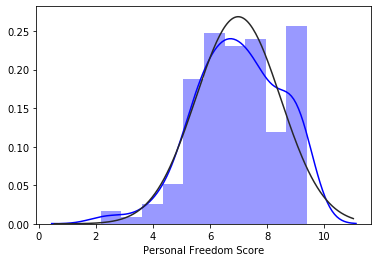

In [9]:
sns.distplot(data_2016['Personal Freedom Score'], fit = norm, color = 'blue');

Personal Freedom data appears bimodel and slightly skewed to the left.

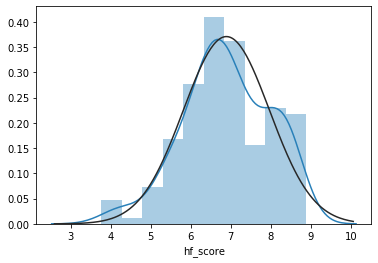

In [10]:
sns.distplot(data_2016['hf_score'], fit = norm, color = '#2980b9');

Human Freedom data appears unimodel and skewed to the left.

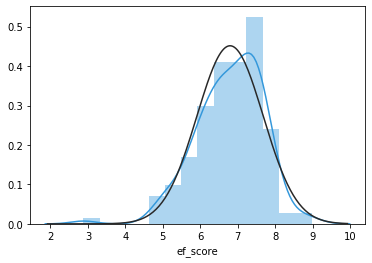

In [11]:
sns.distplot(data_2016['ef_score'], fit = norm, color = '#3498db');

Economic Freedom appears unimodel and skewed to the left

# Correlation chart between multiple sections of personal and economic freedom

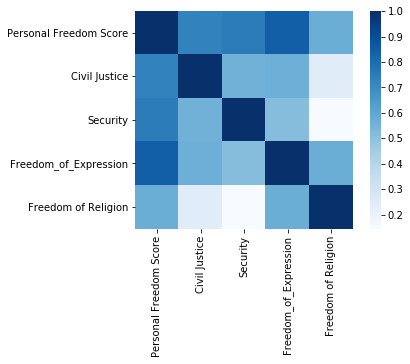

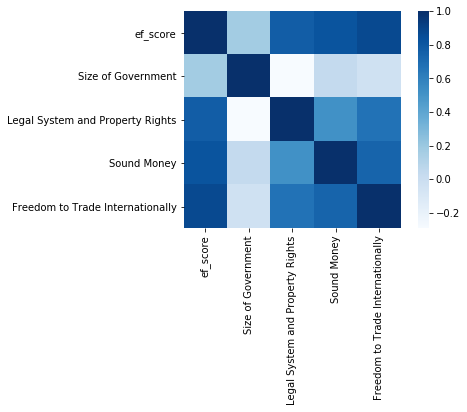

In [12]:
data2016_corr = data_2016[["Personal Freedom Score", "Civil Justice", "Security", "Freedom_of_Expression", "Freedom of Religion"]]
sns.heatmap(data2016_corr.corr(), square=True, cmap='Blues')
plt.show()
data2016_corr = data_2016[["ef_score", "Size of Government", "Legal System and Property Rights", "Sound Money", "Freedom to Trade Internationally"]]
sns.heatmap(data2016_corr.corr(), square=True, cmap='Blues')
plt.show()

Based on our correlation chart, freedom of expression appears to be the best indicator of personal freedom, 
while freedom to trade internationally appears to be the best indicator of Economic Freedom.

Lets create a correlation matrix to see the relationship between Freedom of Expression and Freedom to trade internationally

In [13]:
import plotly.figure_factory as ff
#prepare data
dataframe = data[data.year == 2016]
dataVar = dataframe.loc[:,["ef_trade", "pf_expression"]]
dataVar["index"] = np.arange(1,len(dataVar)+1)
#scatter matrix
fig = ff.create_scatterplotmatrix(dataVar, diag='box', index ='index', colormap = 'Portland', 
                                    colormap_type='cat',
                                   height = 900, width =900)
iplot(fig)

# Personal Freedom vs. Human Freedom vs. Economic Freedom

In [14]:
x = data_2016['Personal Freedom Score'].values
y = data_2016['hf_score'].values
z = data_2016['ef_score'].values


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color= 'blue',                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Personal, Human, and Economic Freedom Rank For Top 10 Global Innovation Index Countries

In [15]:
df = pd.read_csv("INSEADGlobalinnovationIndex2018.csv")
df.head(10)

,Rank,Economy,Income Group(Strength/Weakness),Strength / Weakness,Value,Score
0,1,Switzerland,Strength,Strength,-,68.4
1,2,Netherlands,Strength,Strength,-,63.3
2,3,Sweden,Strength,Strength,-,63.1
3,4,United Kingdom,NaN,Strength,-,60.1
4,5,Singapore,NaN,NaN,-,59.8
5,6,United States of America,NaN,NaN,-,59.8
6,7,Finland,NaN,NaN,-,59.6
7,8,Denmark,NaN,NaN,-,58.4
8,9,Germany,NaN,NaN,-,58.0
9,10,Ireland,NaN,NaN,-,57.2


These are the top 10 economies according to the Global Innovation Index

In [16]:
data=pd.read_csv("hfi_cc_2018.csv")
hdi = ['Switzerland', 'Netherlands', 'Sweden', 'United Kingdom', 'Ireland', 'Singapore', 'United States of America', 'Finland', 'Denmark','Germany']
df_innovation = df[df.Economy.isin(hdi)]
data_innovation = data[data.countries.isin(hdi)]
# import graph objects as "go"
import plotly.graph_objs as go

x = df_innovation.Economy

trace1 = {
  'x': x,
  'y': data_innovation.ef_rank,
  'name': 'Economic Freedom Score',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': data_innovation.hf_rank,
  'name': 'Human Freedom Score',
  'type': 'bar'
};
trace3 = {
  'x': x,
  'y': data_innovation['pf_rank'],
  'name': 'Personal Freedom Score',
  'type': 'bar'
};
data = [trace1, trace2, trace3];
layout = {
  'xaxis': {'title': ' Countries in 2016'},
  'barmode': 'relative',
  'title': 'Personal, Human, and Economic Freedom Rank For Top 10 Global Innovation Index Countries'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

The data above shows that 8 out of the top 10 GII countries are ranked top 10 in Human Freedom,
7 are ranked top 10 in Personal Freedom Score and 4 are ranked top 10 in Economic Freedom.

# Climate Change and Innovation

One potential antidote for climate change is innovation. 
Lets see the Global Innovation Index Rankings of the top 5 GHG emitting countries.

In [17]:
top = ['United States of America', 'China', 'India', 'Russian Federation', 'Japan']
df_power = df[df.Economy.isin(top)]
df_power.describe()

,Rank,Score
count,5.000000,5.00000
mean,27.800000,48.20000
std,22.331592,10.95331
min,6.000000,35.20000
25%,13.000000,37.90000
50%,17.000000,53.10000
75%,46.000000,55.00000
max,57.000000,59.80000


The top 5 cleanest countries according to www.conserve-energy-future.com are: Iceland, Switzerland, Costa Rica, Sweden, and Norway. 
    Lets take a look at their Global Innovation Index rankings.

In [18]:
clean = ["Iceland", "Switzerland", "Costa Rica", "Sweden", "Norway"]
df_clean = df[df.Economy.isin(clean)]
df_clean.describe()

,Rank,Score
count,5.000000,5.00000
mean,20.000000,54.20000
std,21.307276,12.59623
min,1.000000,35.70000
25%,3.000000,51.20000
50%,19.000000,52.60000
75%,23.000000,63.10000
max,54.000000,68.40000


We can clearly see that the top 5 climate friendly countries are on average ranked higher in innovation than the top 5 GHG emitting countries.

# Human, Economic, and Personal Freedom Score For Top 10 Green House Gas Emitting Countries

In [19]:
human = pd.read_csv('hfi_cc_2018.csv')
power = ['United States', 'China', 'India', 'Russia', 'Japan', 'Germany', 'South Korea', 'Iran', 'Canada', 'Saudi Arabia']
data_power = data_2016[data_2016.countries.isin(power)]

Climate change is a surmounting problem plaguing society today. The biggest factor contributing to climate change is the increase in green house gas emissions. According to "ucsusa.org", the top 10 green house gas emitting countries for 2015 are: United States, China, India, Russia, Japan, Germany, South Korea, Iran, Canada, and Saudi Arabia. Lets take a look at the freedom ranks for these countries.

In [20]:
# import graph objects as "go"
import plotly.graph_objs as go

x = data_power.countries

trace1 = {
  'x': x,
  'y': data_power.ef_rank,
  'name': 'Economic Freedom Score',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': data_power.hf_rank,
  'name': 'Human Freedom Score',
  'type': 'bar'
};
trace3 = {
  'x': x,
  'y': data_power['pf_rank'],
  'name': 'Personal Freedom Score',
  'type': 'bar'
};
data = [trace1, trace2, trace3];
layout = {
  'xaxis': {'title': ' Countries in 2016'},
  'barmode': 'relative',
  'title': 'Personal, Human, and Economic Freedom Rank For Top 10 Green House Gas Emitting Countries'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

2016 Human Freedom Rank

Canada: 5
China: 135
Germany: 13
India: 110
Iran: 153
Japan: 31
Russia: 119
Saudi Arabia: 146
United States: 17

2016 Economic Freedom Rank

Canada: 10
China: 108
Germany: 20
India: 96
Iran: 130
Japan: 41
Russia: 87
Saudi Arabia: 103
United States: 6

2016 Personal Freedom Rank

Canada: 12
China: 141
Germany: 9
India: 112
Iran: 154
Japan: 29
Russia: 130
Saudi Arabia: 155
United States: 28

# Global Perspective of Regulation and Innovation

In [21]:
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"])

In [22]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('concap.csv')
data18 = pd.read_csv('hfi_cc_2018.csv')
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data18,left_on='CountryName',right_on='countries')
def mapWorld():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full['ef_regulation_business'].values
    #a_2 = data_full['Economy (GDP per Capita)'].values
    #300*a_2
    m.scatter(lon, lat, latlon=True,c=a_1,s=500,linewidth=1,edgecolors='black',cmap='Blues', alpha=1)
    
    #m.fillcontinents(color='#FFFFFF',lake_color='#FFFFFF',alpha=0.3)
    cbar = m.colorbar()
    cbar.set_label('Business Regulation',fontsize=30)
    #plt.clim(20000, 100000)
    plt.title("Business Regulation (score)", fontsize=30)
    plt.show()
plt.figure(figsize=(30,30))
mapWorld()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\JAHNAVI DEVI\\anaconda3\\epsg'

In [23]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('concap.csv')
data18 = pd.read_csv("INSEADGlobalinnovationIndex2018.csv")
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data18,left_on='CountryName',right_on='Economy')
def mapWorld():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full['Score'].values
    #a_2 = data_full['Economy (GDP per Capita)'].values
    #300*a_2
    m.scatter(lon, lat, latlon=True,c=a_1,s=500,linewidth=1,edgecolors='black',cmap='Reds', alpha=1)
    
    #m.fillcontinents(color='#FFFFFF',lake_color='#FFFFFF',alpha=0.3)
    cbar = m.colorbar()
    cbar.set_label('Global Innovation Score',fontsize=30)
    #plt.clim(20000, 100000)
    plt.title("Global Innovation Index (score)", fontsize=30)
    plt.show()
plt.figure(figsize=(30,30))
mapWorld()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\JAHNAVI DEVI\\anaconda3\\epsg'

In [24]:
data=pd.read_csv("hfi_cc_2018.csv")
data2=pd.read_csv("INSEADGlobalinnovationIndex2018.csv")
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [25]:
data=data.drop(data.iloc[:, 4:61].columns, axis = 1)

In [26]:
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_score', 'pf_rank',
       'ef_government_consumption', 'ef_government_transfers',
       'ef_government_enterprises', 'ef_government_tax_income',
       'ef_government_tax_payroll', 'ef_government_tax', 'ef_government',
       'ef_legal_judicial', 'ef_legal_courts', 'ef_legal_protection',
       'ef_legal_military', 'ef_legal_integrity', 'ef_legal_enforcement',
       'ef_legal_restrictions', 'ef_legal_police', 'ef_legal_crime',
       'ef_legal_gender', 'ef_legal', 'ef_money_growth', 'ef_money_sd',
       'ef_money_inflation', 'ef_money_currency', 'ef_money',
       'ef_trade_tariffs_revenue', 'ef_trade_tariffs_mean',
       'ef_trade_tariffs_sd', 'ef_trade_tariffs',
       'ef_trade_regulatory_nontariff', 'ef_trade_regulatory_compliance',
       'ef_trade_regulatory', 'ef_trade_black', 'ef_trade_movement_foreign',
       'ef_trade_movement_capital', 'ef_trade_movement_visit',
       'ef_trade_movement', 'ef_trade', 'ef_regulation_

In [27]:
data=data.drop(data.iloc[:, 6:61].columns, axis = 1)

In [28]:
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_score', 'pf_rank',
       'ef_score', 'ef_rank', 'hf_score', 'hf_rank', 'hf_quartile'],
      dtype='object')

In [29]:
data2.columns

Index(['Rank', 'Economy', 'Income Group(Strength/Weakness)',
       'Strength / Weakness', 'Value', 'Score'],
      dtype='object')

In [30]:
data.describe()

,year,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,7.201278,77.221335,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,1.374947,44.494004,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,2.166555,1.000000,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,6.197388,39.000000,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,7.189009,77.000000,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,8.449475,115.000000,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.568154,162.000000,9.190000,162.000000,9.126313,162.000000,4.000000


In [31]:
data2.describe()

,Rank,Score
count,126.000000,126.000000
mean,63.500000,36.672222
std,36.517119,12.126959
min,1.000000,15.000000
25%,32.250000,27.300000
50%,63.500000,33.600000
75%,94.750000,45.500000
max,126.000000,68.400000


In [32]:
data2.dtypes

Rank                                 int64
Economy                             object
Income Group(Strength/Weakness)     object
Strength / Weakness                 object
Value                               object
Score                              float64
dtype: object

In [33]:
data2.apply(lambda x: sum(x.isnull()),axis=0)

Rank                                 0
Economy                              0
Income Group(Strength/Weakness)     88
Strength / Weakness                116
Value                                0
Score                                0
dtype: int64

In [34]:
data2.fillna("Weakness",inplace=True)

In [35]:
data2

,Rank,Economy,Income Group(Strength/Weakness),Strength / Weakness,Value,Score
0,1,Switzerland,Strength,Strength,-,68.4
1,2,Netherlands,Strength,Strength,-,63.3
2,3,Sweden,Strength,Strength,-,63.1
3,4,United Kingdom,Weakness,Strength,-,60.1
4,5,Singapore,Weakness,Weakness,-,59.8
...,...,...,...,...,...,...
121,122,Niger,Weakness,Weakness,-,20.6
122,123,Côte d'Ivoire,Weakness,Weakness,-,20.0
123,124,Burkina Faso,Weakness,Weakness,-,18.9
124,125,Togo,Weakness,Weakness,-,18.9


In [36]:
data2.apply(lambda x: sum(x.isnull()),axis=0)

Rank                               0
Economy                            0
Income Group(Strength/Weakness)    0
Strength / Weakness                0
Value                              0
Score                              0
dtype: int64

# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
data2['Income Group(Strength/Weakness)']=labelencoder_y.fit_transform(data2['Income Group(Strength/Weakness)'])

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
data2['Strength / Weakness']=labelencoder_y.fit_transform(data2['Strength / Weakness'])

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
data2['Economy']=labelencoder_y.fit_transform(data2['Economy'])

In [40]:
data2.head(10)

,Rank,Economy,Income Group(Strength/Weakness),Strength / Weakness,Value,Score
0,1,107,0,0,-,68.4
1,2,80,0,0,-,63.3
2,3,106,0,0,-,63.1
3,4,119,1,0,-,60.1
4,5,100,1,1,-,59.8
5,6,120,1,1,-,59.8
6,7,36,1,1,-,59.6
7,8,30,1,1,-,58.4
8,9,39,1,1,-,58.0
9,10,51,1,1,-,57.2


In [41]:
data2=data2.drop(['Value'], axis = 1)
data2

,Rank,Economy,Income Group(Strength/Weakness),Strength / Weakness,Score
0,1,107,0,0,68.4
1,2,80,0,0,63.3
2,3,106,0,0,63.1
3,4,119,1,0,60.1
4,5,100,1,1,59.8
...,...,...,...,...,...
121,122,82,1,1,20.6
122,123,29,1,1,20.0
123,124,18,1,1,18.9
124,125,112,1,1,18.9


In [42]:
x1 = data2.drop(['Score'],axis=1)
y1 = data2['Score']

In [43]:
import statsmodels.api as sm
model1 = sm.OLS(y1,x1).fit()
predictions = model1.predict(x1)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              386.6
Date:                Tue, 19 May 2020   Prob (F-statistic):                    2.94e-68
Time:                        15:51:02   Log-Likelihood:                         -474.35
No. Observations:                 126   AIC:                                      956.7
Df Residuals:                     122   BIC:                                      968.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Rank                               -0.3145      0.027    -11.504      0.000      -0.369      -0.260
Economy                             0.1230      0.024      5.210      0.000       0.076       0.170
Income Group(Strength/Weakness)     7.7559      3.093      2.508      0.013       1.633      13.879
Strength / Weakness                41.8691      3.661     11.435      0.000      34.621      49.117
==============================================================================
Omnibus:                      115.844   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1254.088
Skew:                           3.269   Prob(JB):                    4.77e-273
Kurtosis:                      17.004   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splitting the dataset into Train set and Testing set

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [45]:
x_train

,Rank,Economy,Income Group(Strength/Weakness),Strength / Weakness
116,117,12,1,1
13,14,45,1,1
33,34,62,1,1
75,76,76,1,1
26,27,28,1,1
...,...,...,...,...
67,68,3,1,1
64,65,50,1,1
117,118,83,1,1
47,48,73,0,1


In [46]:
y_train

116    22.9
13     54.6
33     43.2
75     31.1
26     48.7
       ... 
67     32.8
64     33.4
117    22.4
47     37.6
44     37.9
Name: Score, Length: 100, dtype: float64

# Feature scaling

In [47]:
x = x_train.iloc[:,:].values

In [48]:
x

array([[117,  12,   1,   1],
       [ 14,  45,   1,   1],
       [ 34,  62,   1,   1],
       [ 76,  76,   1,   1],
       [ 27,  28,   1,   1],
       [121,  11,   1,   1],
       [ 63,  24,   1,   1],
       [ 61,  97,   1,   1],
       [126, 123,   1,   1],
       [ 79,  56,   1,   1],
       [  4, 119,   1,   0],
       [ 67,  16,   1,   1],
       [  7,  36,   1,   1],
       [ 60,  60,   1,   1],
       [105,  44,   1,   1],
       [ 96, 113,   1,   1],
       [110,   1,   1,   1],
       [ 52,  75,   1,   1],
       [124,  18,   1,   1],
       [ 69,  85,   1,   1],
       [ 28, 104,   1,   1],
       [ 19,  84,   1,   1],
       [120, 124,   1,   1],
       [ 12,  59,   1,   1],
       [ 91,  14,   1,   1],
       [ 74,  57,   1,   1],
       [109,  86,   1,   1],
       [ 90,  63,   1,   1],
       [ 98,  19,   1,   1],
       [  2,  80,   0,   0],
       [ 77,  13,   1,   1],
       [ 43, 117,   0,   1],
       [ 42,  41,   1,   1],
       [  5, 100,   1,   1],
       [ 16,  

In [49]:
y = y_train.iloc[:].values

In [50]:
y

array([22.9, 54.6, 43.2, 31.1, 48.7, 20.6, 33.8, 34.3, 15. , 30.8, 60.1,
       32.8, 59.6, 34.4, 24.9, 27. , 23.9, 36.5, 18.9, 32.8, 48.7, 52.6,
       20.7, 56.6, 28.2, 31.4, 24.1, 28.2, 26.7, 63.3, 31.1, 38.5, 38.9,
       59.8, 54.4, 53. , 35.9, 40.7, 41.7, 59.8, 35.7, 23.1, 27.6, 68.4,
       43. , 47.8, 35.3, 42.9, 50.5, 31.3, 45.7, 25.5, 35.1, 26.8, 24.2,
       44.9, 24.8, 54.5, 29.4, 52. , 46.9, 37.4, 24.5, 30. , 20. , 18.9,
       30.7, 32.4, 30.4, 51.3, 20.7, 31.6, 31.1, 50.3, 42.6, 30.2, 23.8,
       37.8, 23.1, 41.2, 25.3, 32.9, 35. , 55. , 23.3, 28.7, 31.8, 28.7,
       42.6, 23.1, 51.3, 29.9, 57.2, 25.1, 20.6, 32.8, 33.4, 22.4, 37.6,
       37.9])

# Model Building 

In [51]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x,y)

In [52]:
predictions = model.predict(x)

In [53]:
#Check model accuracy
accuracy=model.score(x,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9638933998073489


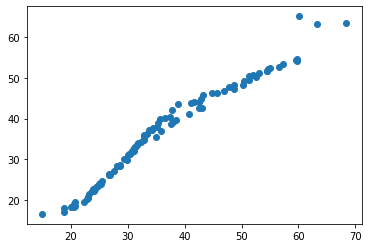

In [54]:
#Visualize the predictions
plt.scatter(y, predictions)

In [55]:
#Define new data instance
xnew = [[61,  97,   1,   1]]

#Make a Prediction
ynew = model.predict(xnew)

#Show the inputs and predicted outputs
print("New Quantities of features=%s, Score=%s" % (xnew,ynew))

New Quantities of features=[[61, 97, 1, 1]], Score=[37.10843769]


In [56]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

In [57]:
# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

The model performance for training set
--------------------------------------
RMSE is 2.3022443158670507
R2 score is 0.9638933998073489


The model performance for testing set
--------------------------------------
Root mean squared error:  2.8493024946475902
R2 score:  0.9411498291929207


In [58]:
#Random forest regression
from sklearn.ensemble import RandomForestRegressor
import math
import sklearn.metrics as metrics
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [59]:
accuracy=regressor.score(x,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.999332001223243


In [60]:
y_pred = regressor.predict([[61, 97, 1, 1]])

In [61]:
y_pred

array([34.37])

In [62]:
# Show model results of training set
y_hat = regressor.predict(x_train)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", regressor.score(x_train,y_train))
# Show model results of testing set
y_hat = regressor.predict(x_test)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TESTING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", regressor.score(x_test,y_test))

TRAINING SET
RMSE:                0.31314533367112474
r2:                  0.999332001223243
TESTING SET
RMSE:                0.3786463745014283
r2:                  0.9989607064865098


Observation 1.This Random Forest Regressor has a higher R-squared compared to Multiple linear regression model and the best RMSE Score

In [63]:
#Fit Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
#Create the Decision Tree regressor object 
dtr = DecisionTreeRegressor(random_state=0)

In [64]:
#Fit the regressor object to the dataset.
dtr.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [65]:
#Predict a new result
y_pred1 = dtr.predict([[61, 97, 1, 1]])

In [66]:
y_pred1

array([34.3])

In [67]:
accuracy=dtr.score(x,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 1.0


In [68]:
# Show model results of training set
y_hat = dtr.predict(x_train)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr.score(x_train,y_train))
# Show model results of testing set
y_hat = dtr.predict(x_test)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TESTING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr.score(x_test,y_test))

TRAINING SET
RMSE:                8.702335715267317e-16
r2:                  1.0
TESTING SET
RMSE:                0.5650051054908873
r2:                  0.9976859360565584


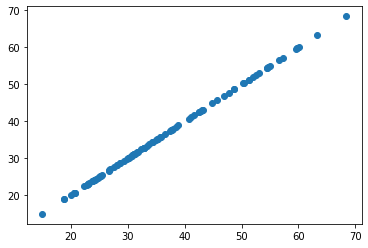

In [69]:
#Visualize the predictions
predictions = dtr.predict(x_train)
plt.scatter(y_train, predictions)